In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
cc7e8 = np.genfromtxt('cc_7e8_linear_wd_plain.dat',names=True)
cc7e8 = cc7e8.transpose()

timmes6 = np.genfromtxt('raw_denc1e8tempc1e7_CO5050_00.dat',names=True)
timmes6 = timmes6.transpose()


#timmes4 = np.genfromtxt('hotwd_denc60e8tempc7e8_CO3050.dat',names=True)
#timmes4 = timmes4.transpose()
coldwd = np.genfromtxt('coldwd_mchandra.dat',names=True,skip_header=1)
coldwd = coldwd.transpose()



print cc7e8.dtype.names
print timmes6.dtype.names


#MASS OF CC7e8
mccbelow1e7 = 0.0
dm = np.zeros(len(cc7e8['radius']),dtype=float)
mr = np.zeros(len(cc7e8['radius']),dtype=float)
coldwdmr = np.zeros(len(coldwd['r']),dtype=float)
coldwddm = np.zeros(len(coldwd['r']),dtype=float)
for x in xrange(len(cc7e8['radius'])):
        if(x==0):
                dm[x] = 4./3.*np.pi*(cc7e8['dens'][x])*(cc7e8['radius'][x])**3
                mr[x] = dm[x]
                    
        else:
                dm[x] = 4.*np.pi*cc7e8['dens'][x]*(cc7e8['radius'][x]-cc7e8['radius'][x-1])*cc7e8['radius'][x]**2
                mr[x] = mr[x-1] + dm[x]
                if(cc7e8['dens'][x]<2.e9):
                    mccbelow1e7 = mccbelow1e7 + dm[x]
print "CC has "+str(mccbelow1e7/1.989e33)+" msolar below density 1e7"
for x in xrange(len(coldwd['r'])):
        if(x==0):
                coldwddm[x] = 4./3.*np.pi*(coldwd['dens'][x])*(coldwd['r'][x])**3
                coldwdmr[x] = coldwddm[x]
        else:
                coldwddm[x] = 4.*np.pi*coldwd['dens'][x]*(coldwd['r'][x]-coldwd['r'][x-1])*coldwd['r'][x]**2
                coldwdmr[x] = coldwdmr[x-1] + coldwddm[x]
                
coldwdmass = round(coldwddm.sum()/1.989e33,3)

masscc = round((dm.sum()/1.989e33),4)
mr = mr/1.989e33

masstimmes6 = round(timmes6['mass_grav'][-1],3)

#masstimmes4 = round(timmes4['mass_grav'][-1],3)

print coldwdmass
print masscc
print "Mass timmes6: "+str(masstimmes6)
#print masstimmes4

ccdr = np.zeros(len(cc7e8['radius']),dtype=float)
timmes6dr = np.zeros(len(timmes6['radius']),dtype=float)
for x in xrange(len(cc7e8['radius'])):
    if(x!=0):
        ccdr[x] = cc7e8['radius'][x]-cc7e8['radius'][x-1]
    else:
        ccdr[x] = cc7e8['radius'][x]
        
for x in xrange(len(timmes6['radius'])):
    if(x!=0):
        timmes6dr[x] = timmes6['radius'][x]-timmes6['radius'][x-1]
    else:
        timmes6dr[x] = timmes6['radius'][x]
        
    
print 'CC: '+str(ccdr.max()/1.e5) + ' km'
print 'TM6: '+str(timmes6dr.max()/1.e5) + ' km'
#print 'TM: '+str(timmes4dr.max()/1.e5) + ' km'
print timmes6dr[3]/1.e5

In [ ]:
fig = plt.figure(figsize=(30,30),dpi=100)

plt.subplot(3,2,1)
#plt.semilogy(timmes4['mass_grav'],timmes4['radius'],label='Hot WD: '+str(masstimmes4)+' $M_\odot$',linewidth=4)
plt.semilogy(timmes6['mass_grav'],timmes6['radius'],label='Hot CO WD: '+str(masstimmes6)+' $M_\odot$',linewidth=4)
#plt.semilogy(timmes1['mass_grav'],timmes1['radius'],label='Hot WD: '+str(masstimmes1)+' $M_\odot$',linewidth=4)
#plt.semilogy(timmes2['mass_grav'],timmes2['radius'],label='Hot WD: '+str(masstimmes2)+' $M_\odot$',linewidth=4)
#plt.semilogy(timmes3['mass_grav'],timmes3['radius'],label='Hot WD: '+str(masstimmes3)+' $M_\odot$',linewidth=4)
plt.xlabel(r'$M_r\;(M_\odot)$',size=30)
plt.ylabel('Radius (cm)',size=20)
plt.grid()
plt.legend(loc=1,prop={'size':15})
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=20)
plt.tick_params(axis='both', which='minor', width=2, length=6)



plt.subplot(3,2,2)
#plt.semilogy(timmes4['mass_grav'],timmes4['pressure'],label='Hot WD: '+str(masstimmes4)+' $M_\odot$',linewidth=4)
plt.semilogy(timmes6['mass_grav'],timmes6['pressure'],label='Hot CO WD: '+str(masstimmes6)+' $M_\odot$',linewidth=4)
#plt.semilogy(timmes1['mass_grav'],timmes1['pressure'],label='Hot WD: '+str(masstimmes1)+' $M_\odot$',linewidth=4)
#plt.semilogy(timmes2['mass_grav'],timmes2['pressure'],label='Hot WD: '+str(masstimmes2)+' $M_\odot$',linewidth=4)
#plt.semilogy(timmes3['mass_grav'],timmes3['pressure'],label='Hot WD: '+str(masstimmes3)+' $M_\odot$',linewidth=4)
plt.xlabel(r'$M_r\;(M_\odot)$',size=30)
plt.ylabel('Pressure (Ba)',size=20)
plt.grid()
plt.legend(loc=1,prop={'size':15})
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=20)
plt.tick_params(axis='both', which='minor', width=2, length=6)



plt.subplot(3,2,3)
#plt.semilogy(timmes4['mass_grav'],timmes4['density'],label='Hot WD: '+str(masstimmes4)+' $M_\odot$',linewidth=4)
plt.semilogy(timmes6['mass_grav'],timmes6['density'],label='Hot CO WD: '+str(masstimmes6)+' $M_\odot$',linewidth=4)
#plt.semilogy(timmes1['mass_grav'],timmes1['density'],label='Hot WD: '+str(masstimmes1)+' $M_\odot$',linewidth=4)
#plt.semilogy(timmes2['mass_grav'],timmes2['density'],label='Hot WD: '+str(masstimmes2)+' $M_\odot$',linewidth=4)
#plt.semilogy(timmes3['mass_grav'],timmes3['density'],label='Hot WD: '+str(masstimmes3)+' $M_\odot$',linewidth=4)
plt.xlabel(r'$M_r\;(M_\odot)$',size=30)
plt.ylabel('Density (g/cm^3)',size=20)
plt.grid()
plt.legend(loc=1,prop={'size':15})
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=20)
plt.tick_params(axis='both', which='minor', width=2, length=6)

plt.subplot(3,2,4)
#plt.plot(timmes4['mass_grav'],timmes4['ye'],label='Hot WD: '+str(masstimmes4)+' $M_\odot$',linewidth=4)
plt.plot(timmes6['mass_grav'],timmes6['ye'],label='Hot CO WD: '+str(masstimmes6)+' $M_\odot$',linewidth=4)
#plt.plot(timmes1['mass_grav'],timmes1['ye'],label='Hot WD: '+str(masstimmes1)+' $M_\odot$',linewidth=4)
#plt.plot(timmes2['mass_grav'],timmes2['ye'],label='Hot WD: '+str(masstimmes2)+' $M_\odot$',linewidth=4)
#plt.plot(timmes3['mass_grav'],timmes3['ye'],label='Hot WD: '+str(masstimmes3)+' $M_\odot$',linewidth=4)
plt.xlabel(r'$M_r\;(M_\odot)$',size=30)
plt.ylabel(r'$\mathrm{Y}_e$',size=30)
plt.grid()
plt.legend(loc=1,prop={'size':15})
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=20)
plt.tick_params(axis='both', which='minor', width=2, length=6)
plt.ylim(0.495,0.51)

plt.subplot(3,2,5)
#plt.plot(timmes4['mass_grav'],timmes4['xc12'],label='Hot WD: '+str(masstimmes4)+' $M_\odot$',linewidth=4)
plt.plot(timmes6['mass_grav'],timmes6['xc12'],label='Hot CO WD: '+str(masstimmes6)+' $M_\odot$',linewidth=4)
#plt.plot(timmes1['mass_grav'],timmes1['xc12'],label='Hot WD: '+str(masstimmes1)+' $M_\odot$',linewidth=4)
#plt.plot(timmes2['mass_grav'],timmes2['xc12'],label='Hot WD: '+str(masstimmes2)+' $M_\odot$',linewidth=4)
#plt.plot(timmes3['mass_grav'],timmes3['xc12'],label='Hot WD: '+str(masstimmes3)+' $M_\odot$',linewidth=4)
plt.xlabel(r'$M_r\;(M_\odot)$',size=30)
plt.ylabel('$\mathrm{X}_{12}$',size=30)
plt.grid()
plt.legend(loc=1,prop={'size':15})
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=20)
plt.tick_params(axis='both', which='minor', width=2, length=6)
#plt.yticks(np.linspace(0.45,0.55,11))

plt.subplot(3,2,6)
#plt.plot(timmes4['mass_grav'],timmes4['xne22'],label='Hot WD: '+str(masstimmes4)+' $M_\odot$',linewidth=4)
plt.semilogy(timmes6['mass_grav'],timmes6['temp'],label='Hot CO WD: '+str(masstimmes6)+' $M_\odot$',linewidth=4)
#plt.plot(timmes1['mass_grav'],timmes1['xne22'],label='Hot WD: '+str(masstimmes1)+' $M_\odot$',linewidth=4)
#plt.plot(timmes2['mass_grav'],timmes2['xne22'],label='Hot WD: '+str(masstimmes2)+' $M_\odot$',linewidth=4)
#plt.plot(timmes3['mass_grav'],timmes3['xne22'],label='Hot WD: '+str(masstimmes3)+' $M_\odot$',linewidth=4)
plt.xlabel(r'$M_r\;(M_\odot)$',size=30)
plt.ylabel('Temperature (K)',size=30)
#plt.yticks(np.linspace(0.,0.1,6))
#plt.ylim(0.,2.)

plt.grid()
plt.legend(loc=1,prop={'size':15})
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=20)
plt.tick_params(axis='both', which='minor', width=2, length=6)

plt.tight_layout()

plt.show()

In [ ]:
np.savetxt('coldwd_denc79e7tempc4e8_CO5050.dat',np.c_[r,dens,temp,xc12,xne22],fmt='%1.9e',header='radius dens temp xc12 xne22')

0.5
0.607852074
0.607825436436
0.607825436436
0.5
0.903589697
0.90348708673
0.5
0.607852074
0.607825436436
1.00065624903
STARTING...
DONE!
[  1.17159359e+21   1.47549640e+21   2.02380246e+21 ...,   9.78361477e+28
   9.78092284e+28   9.77823676e+28]


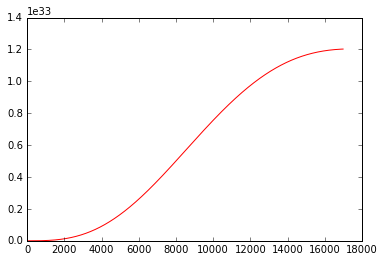

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
timmes6 = np.genfromtxt('sample3.dat',names=True)
timmes6 = timmes6.transpose()

deltar =0.5e5
r     = np.linspace(timmes6['radius'][0],timmes6['radius'].max(),timmes6['radius'].max()/deltar)
dens  = np.interp(r,timmes6['radius'][0:-1],timmes6['density'][0:-1])
temp  = np.interp(r,timmes6['radius'][0:-1],timmes6['temp'][0:-1])
xc12  = np.interp(r,timmes6['radius'][0:-1],timmes6['xc12'][0:-1])
xne22 = np.interp(r,timmes6['radius'][0:-1],timmes6['xne22'][0:-1])

print deltar/1.e5
print timmes6['mass_grav'][-1]
mass_interp = np.zeros(len(dens))
dmass_interp = np.zeros(len(dens))
for x in xrange(len(r)):
        if(x==0):
            mass_interp[x] = 4.0/3.0*np.pi*r[x]**3.*dens[x]
            dmass_interp[x] = 4.0/3.0*np.pi*r[x]**3.*dens[x]
        else:
            mass_interp[x] = mass_interp[x-1] + 4.0/3.0*np.pi*r[x]**3.*dens[x] - 4.0/3.0*np.pi*r[x-1]**3.*dens[x]
            dmass_interp[x] = 4.0/3.0*np.pi*r[x]**3.*dens[x] - 4.0/3.0*np.pi*r[x-1]**3.*dens[x]
print mass_interp[-1]/1.989e33
print dmass_interp.sum()/1.989e33
#########################################################
timmes5 = np.genfromtxt('sample2.dat',names=True)
timmes5 = timmes5.transpose()

deltar  = 0.5e5
r_2     = np.linspace(timmes5['radius'][0],timmes5['radius'].max(),timmes5['radius'].max()/deltar)
dens_2  = np.interp(r_2,timmes5['radius'][0:-1],timmes5['density'][0:-1])
temp_2  = np.interp(r_2,timmes5['radius'][0:-1],timmes5['temp'][0:-1])
xc12_2  = np.interp(r_2,timmes5['radius'][0:-1],timmes5['xc12'][0:-1])
xne22_2 = np.interp(r_2,timmes5['radius'][0:-1],timmes5['xne22'][0:-1])

print deltar/1.e5
print timmes5['mass_grav'][-1]
mass_interp_2 = np.zeros(len(dens_2))
for x in xrange(len(r_2)):
        if(x==0):
            mass_interp_2[x] = 4.0/3.0*np.pi*r_2[x]**3.*dens_2[x]
        else:
            mass_interp_2[x] = mass_interp_2[x-1] + 4.0/3.0*np.pi*r_2[x]**3.*dens_2[x] - 4.0/3.0*np.pi*r_2[x-1]**3.*dens_2[x]

print mass_interp_2[-1]/1.989e33
#########################################################
timmes3 = np.genfromtxt('sample3.dat',names=True)
timmes3 = timmes3.transpose()

deltar  = 0.5e5
r_3     = np.linspace(timmes3['radius'][0],timmes3['radius'].max(),timmes3['radius'].max()/deltar)
dens_3  = np.interp(r_3,timmes3['radius'][0:-1],timmes3['density'][0:-1])
temp_3  = np.interp(r_3,timmes3['radius'][0:-1],timmes3['temp'][0:-1])
xc12_3  = np.interp(r_3,timmes3['radius'][0:-1],timmes3['xc12'][0:-1])
xne22_3 = np.interp(r_3,timmes3['radius'][0:-1],timmes3['xne22'][0:-1])

print deltar/1.e5
print timmes3['mass_grav'][-1]
mass_interp_3 = np.zeros(len(dens_3))
for x in xrange(len(r_3)):
        if(x==0):
            mass_interp_3[x] = 4.0/3.0*np.pi*r_3[x]**3.*dens_3[x]
        else:
            mass_interp_3[x] = mass_interp_3[x-1] + 4.0/3.0*np.pi*r_3[x]**3.*dens_3[x] - 4.0/3.0*np.pi*r_3[x-1]**3.*dens_3[x]

print mass_interp_3[-1]/1.989e33

#constants
mp = 1.6726231e-24 # mass of proton
G  = 6.67259e-8 # grav. constant
e  = 4.8032068e-10 # electron charge in esu
k  = 1.380658e-16
yr = 365.25*24.0*3600.0 # seconds in a year
# parameters
Z = 7.
A = 14.
def gamma(dens,temp):
    ni = dens/(A*mp)
    a  = (3.0/(4.0*np.pi*ni))**(1./3.)
    gamma = (Z*e**2.)/(a*k*temp)
    return gamma
#############################
gamma_var = gamma(dens,temp)
gamma_var_2 = gamma(dens_2,temp_2)
gamma_var_3 = gamma(dens_3,temp_3)
print gamma_var.min()
deltat = np.zeros(len(dens))
for x in xrange(1,len(dens)+1):
    if x==1:
        deltat[-x] = 0.0
    else:
        deltat[-x] = Z*e*(gamma_var[-x])**(1./3.)
        deltat[-x] = deltat[-x]/(18.0*mp*G*(4.*np.pi*dens[-x])**0.5)
        deltat[-x] = deltat[-x]*(mass_interp[-x+1]-mass_interp[-x])/mass_interp[-x]
        deltat[-x] = deltat[-x] + deltat[-x+1]
deltat[0] = deltat[1]
deltat = deltat/yr
##############################
deltat_2 = np.zeros(len(dens_2))
for x in xrange(1,len(dens_2)+1):
    if x==1:
        deltat_2[-x] = 0.0
    else:
        deltat_2[-x] = Z*e*(gamma_var_2[-x])**(1./3.)
        deltat_2[-x] = deltat_2[-x]/(18.0*mp*G*(4.*np.pi*dens_2[-x])**0.5)
        deltat_2[-x] = deltat_2[-x]*(mass_interp_2[-x+1]-mass_interp_2[-x])/mass_interp_2[-x]
        deltat_2[-x] = deltat_2[-x] + deltat_2[-x+1]
deltat_2[0] = deltat_2[1]
deltat_2 = deltat_2/yr
##############################
deltat_3 = np.zeros(len(dens_3))
for x in xrange(1,len(dens_3)+1):
    if x==1:
        deltat_3[-x] = 0.0
    else:
        deltat_3[-x] = Z*e*(gamma_var_3[-x])**(1./3.)
        deltat_3[-x] = deltat_3[-x]/(18.0*mp*G*(4.*np.pi*dens_3[-x])**0.5)
        deltat_3[-x] = deltat_3[-x]*(mass_interp_3[-x+1]-mass_interp_3[-x])/mass_interp_3[-x]
        deltat_3[-x] = deltat_3[-x] + deltat_3[-x+1]
deltat_3[0] = deltat_3[1]
deltat_3 = deltat_3/yr
###############################
hubbletime = 13.7*np.ones(len(deltat))
mblank = np.linspace(0.,1.4,len(deltat))
#plt.figure(figsize=(10,10))
#plt.plot(mass_interp/1.989e33,deltat/1.e9,'k-',lw=4)
#plt.plot(mass_interp_2/1.989e33,deltat_2/1.e9,'k-',lw=4)
#plt.plot(mass_interp_3/1.989e33,deltat_3/1.e9,'k-',lw=4)
#plt.plot(mblank,hubbletime,'k--',lw=4)
#plt.ylabel('Ne22 Sinking Time (Gyr)',size=30)
#plt.xlabel(r'Mass Interior (M$_\odot$)',size=30)
#plt.ylim(0.,20.)
#plt.xlim(0.,1.4)
#plt.grid()
#plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=20)
#plt.tick_params(axis='both', which='minor', width=2, length=6)

for x in xrange(1,len(dens)+1):
    if x==1:
        deltat[-x] = 0.0
    else:
        deltat[-x] = Z*e*(gamma_var[-x])**(1./3.)
        deltat[-x] = deltat[-x]/(18.0*mp*G*(4.*np.pi*dens[-x])**0.5)
        deltat[-x] = deltat[-x]*(mass_interp[-x+1]-mass_interp[-x])/mass_interp[-x]
        #deltat[-x] = deltat[-x] + deltat[-x+1]
deltat[0] = deltat[1]
#deltat = deltat/(1.e9*yr)  # deltat t in giga years
#mass_interp = mass_interp/1.989e33 # mass in msolar
Nout = 10
mne22loc = mass_interp[:-Nout]
dens_interp = dens[:-Nout]
temp_interp = temp[:-Nout]
gamma_var = gamma(dens[:-Nout],temp[:-Nout])
dm = np.zeros(len(mne22loc))
t = 0.0 
dt = 1.e7*yr
print "STARTING..."
while t < 1.e9*yr:
    for x in xrange(len(mne22loc)):
        dm[x] = 18.0*mp*G*np.sqrt(4.0*np.pi*dens_interp[x])/(Z*e*gamma_var[x]**(1./3.))*mne22loc[x]*dt
        mne22loc[x] = mne22loc[x] - dm[x]
        if mne22loc[x] < mass_interp[0]:
            mne22loc[x]=mass_interp[0]
    mne22loc = np.sort(mne22loc)
    dens_interp = np.interp(mne22loc,mass_interp[:-Nout],dens[:-Nout])
    temp_interp = np.interp(mne22loc,mass_interp[:-Nout],temp[:-Nout])
    gamma_var = gamma(dens_interp,temp_interp)
    t = t+dt
print "DONE!"
print dm
plt.plot(mne22loc,'r-')

In [10]:
N = 800
mrbins = np.linspace(mass_interp[0],mass_interp[-1],N)
dmbins_old = np.diff(mrbins)[0]*np.ones(N) # old bin mass
dmbins_old_ne22 = dmbins_old*0.02 # old ne22 bin mass
dmbins_old_co = dmbins_old*0.98
dmbins_new = np.zeros(N)
dmbins_new_ne22 = np.zeros(N)
dmbins_new_co = dmbins_old_co

for j in xrange(N-1):
    for i in xrange(len(mne22loc)):
        if mne22loc[i] < mrbins[j+1] and mne22loc[i] >= mrbins[j]:
            dmbins_new_ne22[j] = dmbins_new_ne22[j] + dmbins_old_ne22[0]*N/len(mne22loc) # new ne22 bin mass
xne22_old = dmbins_old_ne22/dmbins_old
xne22_new = dmbins_new_ne22/(dmbins_new_co+dmbins_new_ne22)
print gamma_var

[ 1.00065625  1.00065628  1.00065633 ...,  3.057439    3.05780061
  3.05816232]


(0.0, 0.2)

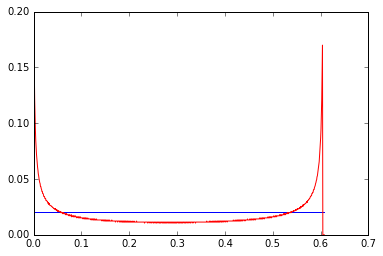

In [11]:
plt.plot(mrbins/1.989e33,xne22_old,'b-')
plt.plot(mrbins/1.989e33,xne22_new,'r-')
plt.ylim(0.0,0.2)
#plt.xlim(1.1,1.2)

In [ ]:
print deltat[:-1].min()/(yr)
plt.semilogy(18.0*mp*G*np.sqrt(4.0*np.pi*dens_interp)/(Z*e*gamma_var**(1./3.))*mne22loc/yr)

In [ ]:
plt.plot(dens**0.5/gamma(dens,temp)**(1./3.))

In [ ]:
plt.plot(mass_interp)

In [8]:
print np.sort(mne22loc)

[  8.27954825e+23   1.17872166e+24   1.61674429e+24 ...,   1.20743793e+33
   1.20744803e+33   1.20745813e+33]
